# MACHINE LEARNING FOR FINANCIAL SERVICES

Welcome to IBM's Data Science Experience! This exciting tool will help your life a lot easier as a data scientist. Below is an introductory example of how easy for you to load your data and run a supervised machine learning algorithm.

## Churn Prediction:  Supervised Machine Learning with KNN

The purpose of this notebook is to introduce KNN algorithm and associated metrics using a hypothetical insurance data.  Supervised machine learning has a goal to "classify" the data by training the models to predict for the pre-lableled response vector (a famous example would be ham/spam classification), and has gained its popularity for various intuitive modeling techniques being introduced and enhanced. In this python notebook example, let me introduce KNN.  This will show how to train and to check a few basic and popular metrics for KNN, which provides general purview of how to assess your model accuracy and performance.  As this could be too basic for some of the viewers, this example gears towards the data scientist users who'd like to review or like to gain some basic knowledge of KNN machine learning. 

### KNN is..
from [wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

> In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

>In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

## To load the data:

1. Load your local file into your notebook. Click the **Find and Add Data** icon on the notebook action bar. Drop the file into the box or browse to select the file. The file is loaded to your object storage and appears in the Data Assets section of the project. For more information, see <a href="https://datascience.ibm.com/docs/content/analyze-data/load-and-access-data.html" target="_blank" rel="noopener noreferrer">Load and access data</a>.
1. click in the next code cell and select **Insert to code > pandas DataFrame** under the file name.

In [1]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_fcf1c90868844bc1ab7d4fffe6063140(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_4a6fd2c26617760f817f90c4ebbaee820653e676','domain': {'id': 'xxx Your ID xxxx'},
            'password': 'xx Your Password xxx'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df = pd.read_csv(get_object_storage_file_with_credentials_fcf1c90868844bc1ab7d4fffe6063140('MLshowcase', 'merge_ab_chyl1.csv'))
df.shape

(534, 39)

In [37]:
df.to_csv('merge_ab_chyl1.csv', index = False)
%ls -l

total 41123808
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users 17425846272 Oct  4 13:10 core.2421
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users       30706 Oct  3 09:21 CRPMT_SAMPLE.csv
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users       36694 Oct  3 09:48 FRAUD_SAMPLE1.csv
-rw------- 1 scc8-d44aeb3f7d9dd3-674d31d66b72 users      101856 Oct  9 08:08 merge_ab_chyl1.csv
drwx------ 2 scc8-d44aeb3f7d9dd3-674d31d66b72 users        4096 Aug 30 09:17 MNIST_data/


In [2]:
# create a feature matrix 'X' by selecting two DataFrame columns
# obviously, you can select more features as you wish.  please be assured the feature should be numerical

feature_cols = ['CLAIMS_COUNT', 'GROSS_PREMIUM']
X = df.loc[:, feature_cols]
X.shape
# X.head()

(534, 2)

In [3]:
# create a response vector 'y' by selecting a Series
y = df.CHURN
y.shape
# y.head()

(534,)

In [4]:
# calling and setting up supervised learning - knn model
# n_neighbors is a hyperparameter that can be tuned or K in KNN model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')


In [5]:
# training the model with above model configuration
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [6]:
# STEP 1: split X and y into training and testing sets with test size is 40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [7]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(320, 2)
(214, 2)


In [8]:
y_pred = knn.predict(X_test)

## CONFUSION MATRIX & CLASSIFICATION REPORT

In [15]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred))

[[194   0]
 [ 14   6]]


In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

conf_series = [TP, TN, FP, FN]
conf_series

[6, 194, 0, 14]

In [17]:
# classification accuracy
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.934579439252
0.934579439252


In [18]:
# classification error
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.0654205607477
0.0654205607477


In [19]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred))

0.3
0.3


In [20]:
# Specificity: When the actual value is negative, how often is the prediction correct?
print(TN / float(TN + FP))

1.0


In [21]:
# Precision: When a positive value is predicted, how often is the prediction correct?
from sklearn import metrics
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

1.0
1.0


In [22]:
# classification report is a standard report from scikit learn metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       194
          1       1.00      0.30      0.46        20

avg / total       0.94      0.93      0.92       214



Quick summary of what those mean...
- The precision is the ratio tp / (tp + fp). The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- The recall is the ratio tp / (tp + fn). The recall is intuitively the ability of the classifier to find all the positive samples.
- The F score can be interpreted as a weighted harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The F score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.
- The support is the number of occurrences of each class in y_true.

## PREDICTED PROBABILITY AND CHANGING THRESHOLD

In [23]:
# print the first 10 predicted responses
knn.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# print the first 10 predicted probabilities of class membership
knn.predict_proba(X_test)[0:10, :]

array([[ 0.93333333,  0.06666667],
       [ 0.93333333,  0.06666667],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.93333333,  0.06666667],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [25]:
# store the predicted probabilities for class 1
y_pred_prob = knn.predict_proba(X_test)[:, 1]

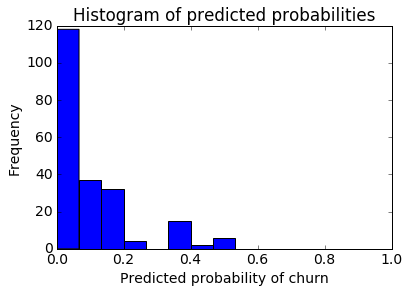

In [26]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

# histogram of predicted probabilities

plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of churn')
plt.ylabel('Frequency')

In [27]:
# predict churn if the predicted probability is greater than 30% or 0.3

from sklearn.preprocessing import binarize
y_pred_ch = binarize([y_pred_prob], 0.3)[0]

In [28]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.06666667,  0.06666667,  0.        ,  0.        ,  0.        ,
        0.06666667,  0.        ,  0.        ,  0.        ,  0.        ])

In [29]:
# print the first 10 predicted classes with the lower threshold
y_pred_ch[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [30]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[194   0]
 [ 14   6]]


In [31]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_ch))

[[181  13]
 [ 10  10]]


## ROC CURVE AND AUC

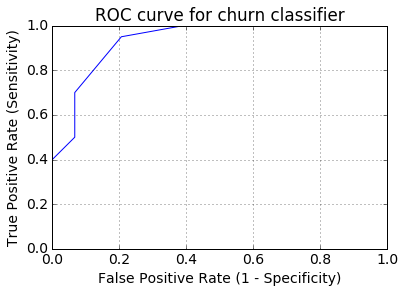

In [32]:
# ROC curve allows to see how sensitivity and specificity are affected by various thresholds
# IMPORTANT: first argument is true values, second argument is predicted probabilities

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for churn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [33]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [34]:
evaluate_threshold(0.3)

Sensitivity: 0.5
Specificity: 0.932989690722


In [35]:
# AUC is the percentage of the ROC plot that is underneath the curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities

print(metrics.roc_auc_score(y_test, y_pred_prob))

0.934149484536


- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher   predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [36]:
# calculate cross-validated AUC
# cross-validation: cuts the data into 10 sub-samples to iterate train/test procedures, in order to generalize the performance of ML algorithms
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()

0.79363622931442079

Confusion matrix advantages:
- Allows you to calculate a variety of metrics
- Useful for multi-class problems (more than two response classes)

ROC/AUC advantages:
- Does not require you to set a classification threshold
- Still useful when there is high class imbalance

## SUMMARY
This illustrative python notebook shows how to get started with supervised machine learning utilizing KNN technique and related metrics.  I hope you to see how easy to adopt IBM's Data Science Experience for your data analytics and modeling needs.  Please find overview and getting-started information in the Data Science Experience documentation: https://datascience.ibm.com/docs/content/getting-started/welcome-main.html. 
Learn about Jupyter notebooks, which are used throughout this scenario, in the Data Science Experience documentation: https://datascience.ibm.com/docs/content/analyze-data/notebooks-parent.html